# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass=10
shufflePixels = False # will generate noise here 
shuffleLabels = False

In [5]:
# Load data
_, y_train, _, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

x_train = np.random.uniform(low=0, high=225, size=(50000, 32, 32, 3))
x_test = np.random.uniform(low=0, high=225, size=(10000, 32, 32, 3))
x_train = np.int8(x_train)
x_test = np.int8(x_test)

"""
Generate randome labels (equal likely)
"""

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Populating the interactive namespace from numpy and matplotlib


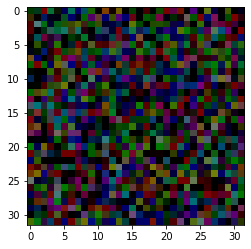

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

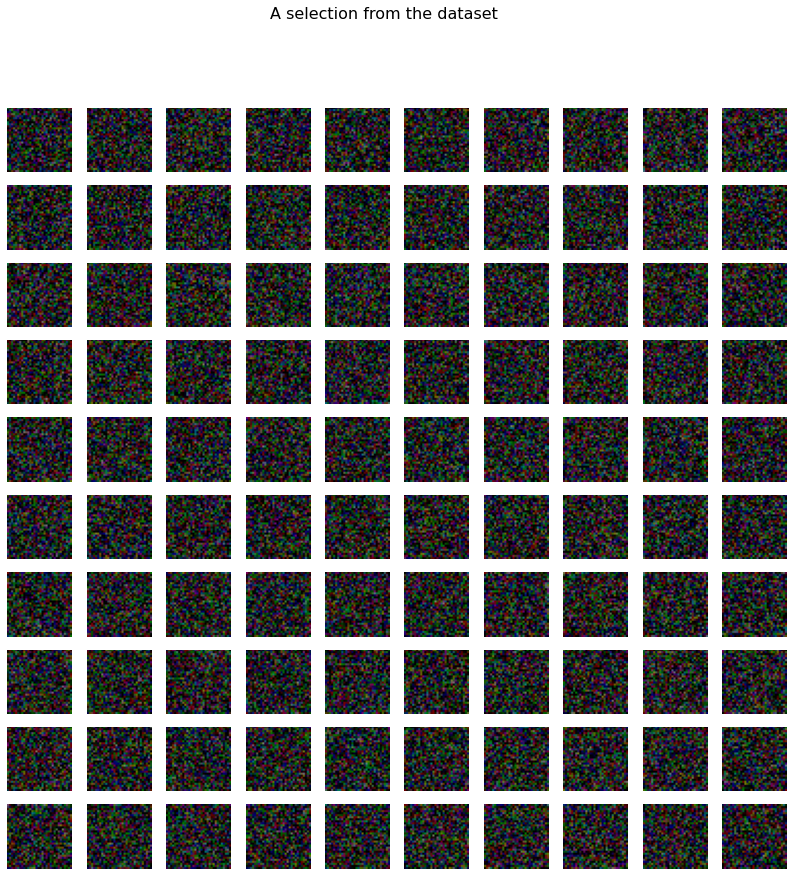

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 12s 39ms/step - loss: 2.3056 - accuracy: 0.0992
test loss, test acc: [2.305588483810425, 0.09923999756574631]
Evaluate on test data
20/20 [==============================] - 1s 67ms/step - loss: 2.3058 - accuracy: 0.1001
test loss, test acc: [2.3057973384857178, 0.10010000318288803]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
500/500 [==============================] - 17s 31ms/step - loss: 2.3035 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.0994
Epoch 2/250
500/500 [==============================] - 16s 31ms/step - loss: 2.3029 - accuracy: 0.0988 - val_loss: 2.3029 - val_accuracy: 0.0986
Epoch 3/250
500/500 [==============================] - 15s 31ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3028 - val_accuracy: 0.0993
Epoch 4/250
500/500 [==============================] - 15s 30ms/step - loss: 2.3025 - accuracy: 0.1029 - val_loss: 2.3029 - val_accuracy: 0.0979
Epoch 5/250
500/500 [==============================] - 16s 31ms/step - loss: 2.3022 - accuracy: 0.1051 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/250
500/500 [==============================] - 15s 30ms/step - loss: 2.3021 - accuracy: 0.1046 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 7/250
500/500 [==============================] - 16s 31ms/step - loss: 2.3019 - accuracy: 0.1088 - val_loss: 2.3027 - val_ac

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 3s 29ms/step - loss: 0.0138 - accuracy: 0.9953
test loss, test acc: [0.013794311322271824, 0.9952999949455261]
Evaluate on test data
20/20 [==============================] - 1s 29ms/step - loss: 8.5000 - accuracy: 0.0979
test loss, test acc: [8.499979972839355, 0.09790000319480896]


# Small

In [12]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 1s 7ms/step - loss: 22.1654 - accuracy: 0.0984
test loss, test acc: [22.165403366088867, 0.09836000204086304]
Evaluate on test data
20/20 [==============================] - 0s 10ms/step - loss: 22.1248 - accuracy: 0.1000
test loss, test acc: [22.12482261657715, 0.10000000149011612]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
500/500 [==============================] - 5s 7ms/step - loss: 3.6714 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/250
500/500 [==============================] - 4s 7ms/step - loss: 2.3065 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/250
500/500 [==============================] - 3s 7ms/step - loss: 2.3054 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/250
500/500 [==============================] - 4s 7ms/step - loss: 2.3040 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/250
500/500 [==============================] - 4s 7ms/step - loss: 2.3041 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/250
500/500 [==============================] - 4s 7ms/step - loss: 2.3036 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/250
500/500 [==============================] - 3s 7ms/step - loss: 2.3038 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 1s 6ms/step - loss: 2.1756 - accuracy: 0.2513
test loss, test acc: [2.175628662109375, 0.25130000710487366]
Evaluate on test data
20/20 [==============================] - 0s 6ms/step - loss: 2.3272 - accuracy: 0.1061
test loss, test acc: [2.3272385597229004, 0.10610000044107437]


#tNet

In [16]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [17]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 5s 44ms/step - loss: 3.8555 - accuracy: 0.0989
test loss, test acc: [3.8554978370666504, 0.098860003054142]
Evaluate on test data
20/20 [==============================] - 1s 57ms/step - loss: 3.8519 - accuracy: 0.1014
test loss, test acc: [3.8519394397735596, 0.10140000283718109]


In [18]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
500/500 [==============================] - 22s 40ms/step - loss: 2.5438 - accuracy: 0.1015 - val_loss: 2.4042 - val_accuracy: 0.1017
Epoch 2/250
500/500 [==============================] - 20s 39ms/step - loss: 2.2636 - accuracy: 0.1576 - val_loss: 2.3598 - val_accuracy: 0.1056
Epoch 3/250
500/500 [==============================] - 19s 39ms/step - loss: 2.1017 - accuracy: 0.2454 - val_loss: 2.3891 - val_accuracy: 0.1059
Epoch 4/250
500/500 [==============================] - 20s 39ms/step - loss: 1.9356 - accuracy: 0.3222 - val_loss: 2.4626 - val_accuracy: 0.1016
Epoch 5/250
500/500 [==============================] - 19s 39ms/step - loss: 1.7484 - accuracy: 0.3985 - val_loss: 2.5855 - val_accuracy: 0.1008
Epoch 6/250
500/500 [==============================] - 20s 39ms/step - loss: 1.5537 - accuracy: 0.4712 - val_loss: 2.7433 - val_accuracy: 0.1028
Epoch 7/250
500/500 [==============================] - 20s 39ms/step - loss: 1.3272 - accuracy: 0.5518 - val_loss: 2.9546 - val_ac

In [19]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 4s 39ms/step - loss: 0.0110 - accuracy: 0.9987
test loss, test acc: [0.011023360304534435, 0.9986799955368042]
Evaluate on test data
20/20 [==============================] - 1s 38ms/step - loss: 7.8657 - accuracy: 0.0976
test loss, test acc: [7.865653038024902, 0.09759999811649323]


# ConvNet

In [20]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [21]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 8s 60ms/step - loss: 3.8175 - accuracy: 0.0986
test loss, test acc: [3.817467451095581, 0.09861999750137329]
Evaluate on test data
20/20 [==============================] - 2s 103ms/step - loss: 3.8138 - accuracy: 0.0997
test loss, test acc: [3.8138062953948975, 0.09969999641180038]


In [22]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
500/500 [==============================] - 21s 39ms/step - loss: 2.3116 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.0996
Epoch 2/250
500/500 [==============================] - 19s 39ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 3/250
500/500 [==============================] - 19s 39ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.0998
Epoch 4/250
500/500 [==============================] - 19s 39ms/step - loss: 2.3026 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 5/250
500/500 [==============================] - 19s 39ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 6/250
500/500 [==============================] - 19s 39ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 7/250
500/500 [==============================] - 20s 39ms/step - loss: 2.3026 - accuracy: 0.0976 - val_loss: 2.3026 - val_ac

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 5s 46ms/step - loss: 2.3026 - accuracy: 0.1000
test loss, test acc: [2.302586793899536, 0.09997999668121338]
Evaluate on test data
20/20 [==============================] - 1s 45ms/step - loss: 2.3026 - accuracy: 0.1000
test loss, test acc: [2.3025858402252197, 0.10000000149011612]


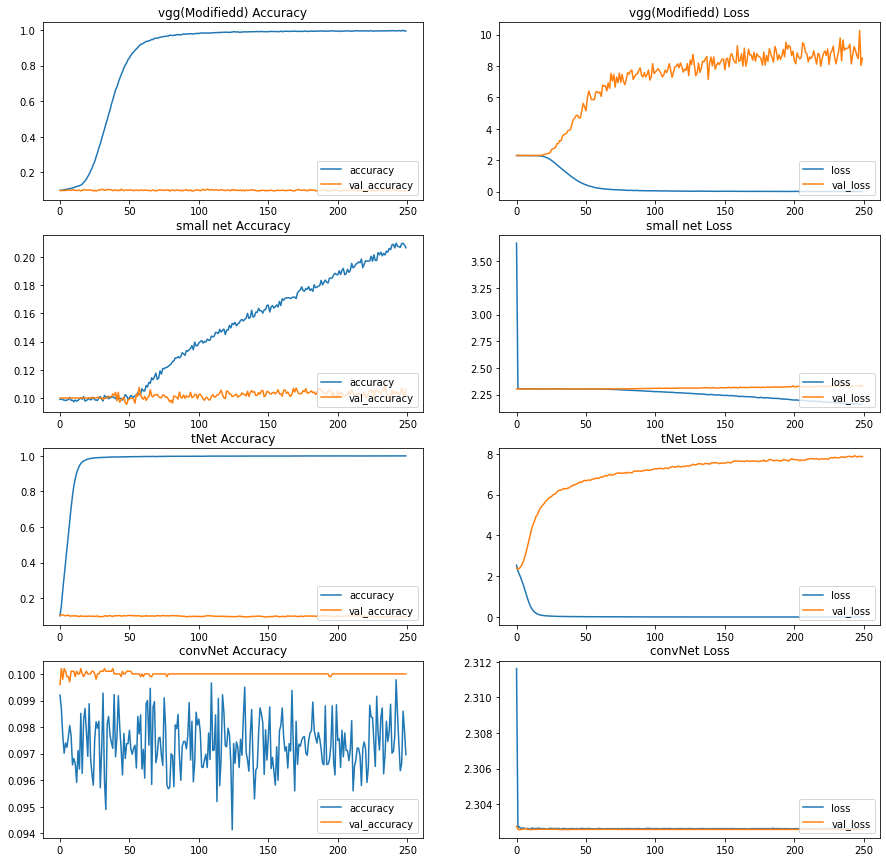

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modifiedd)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1


In [ ]:
add noraliztion
does reducing conv layers have significant impact? directly related to number of parameters